# Visualizations

In [ ]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re # for regular expression
import string
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [ ]:
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
# read file and save it in a data frame
data_df=pd.read_excel('/content/datasetMovie.xltx') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
#libraries for word occurrence()
'''from sklearn.feature_extraction.text  import TfidfTransformer
from sklearn.feature_extraction.text  import CountVectorizer'''

In [8]:
import seaborn as sns
import arabic_reshaper

In [10]:
# remove punctuations  
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
#this funcation take txet as input and return the text after removing punctuations 
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)  

In [11]:
def normalize_arabic(text):
    
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ؤ", "و", text)

    return text

In [12]:
def processPost(tweet):
    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    #check if the word in the dictionary list (it have two letters as part of the word)
    tweet= normalize_arabic(tweet)
    
    
    #remove numbers
    tweet = ''.join(i for i in tweet if not i.isdigit())
    #remove english letters
    tweet= re.sub(r'[a-z]+'," ", tweet)
    tweet= re.sub(r'[A-Z]+'," ", tweet)
    
    
    return tweet

In [13]:
data_df["clean text"] =data_df["Text"].apply(lambda x: processPost(x))

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["clean text"].apply(tokenizer.tokenize)

In [ ]:
all_words = [word for tokens in data_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_df["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

In [33]:
df1 = data_df[data_df['clean text'].str.contains('كوميدي')]

In [39]:
df2 = data_df[data_df['clean text'].str.contains('ساخر')]

In [35]:
df3 = data_df[data_df['clean text'].str.contains('مضحك')]

In [36]:
df4 = data_df[data_df['clean text'].str.contains('افيهات')]

In [40]:
#merge the four dataframes into one dataframe that is df_comedy
frames = [df1,df2,df3,df4]
df_comedy = pd.concat(frames)

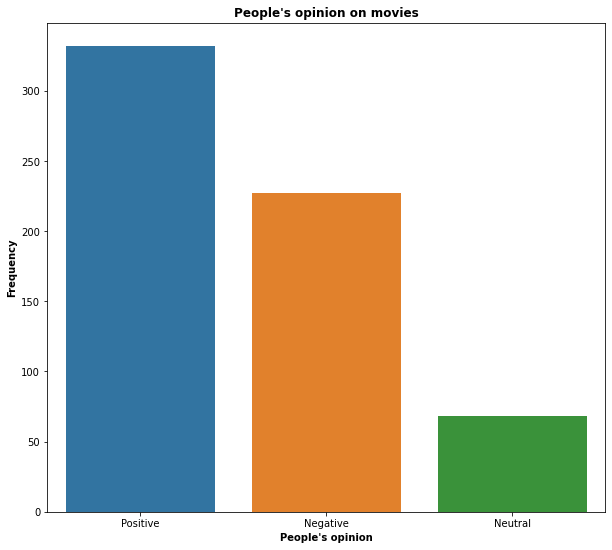

In [48]:
#bar chart
plt.figure(figsize=[10,9]);
order_by_count = df_comedy.classification.value_counts().index
sns.countplot(data = df_comedy, x='classification', order = order_by_count);
plt.title('People\'s opinion on movies', fontsize=12, weight='bold');
plt.xlabel('People\'s opinion',fontsize=10, weight='bold');
plt.ylabel('Frequency',fontsize=10, weight='bold');

In [ ]:
#pie chart
plt.figure(figsize=[10,9]);
y = df_comedy.classification.value_counts()
myLabels = ["Positive","Negative","Neutral"]
plt.pie(y, labels= myLabels , autopct= '%1.1f%%', textprops={'fontsize':15, 'weight':'bold'})
plt.show()

In [43]:
df5 = data_df[data_df['clean text'].str.contains('وقت')]

In [44]:
df6 = data_df[data_df['clean text'].str.contains('مده')]

In [45]:
df7 = data_df[data_df['clean text'].str.contains('طويل')]

In [46]:
df8 = data_df[data_df['clean text'].str.contains('طويل جدا')]

In [47]:
#merge the four dataframes into one dataframe that is df_time
frame = [df5,df6,df7,df8]
df_time = pd.concat(frame)

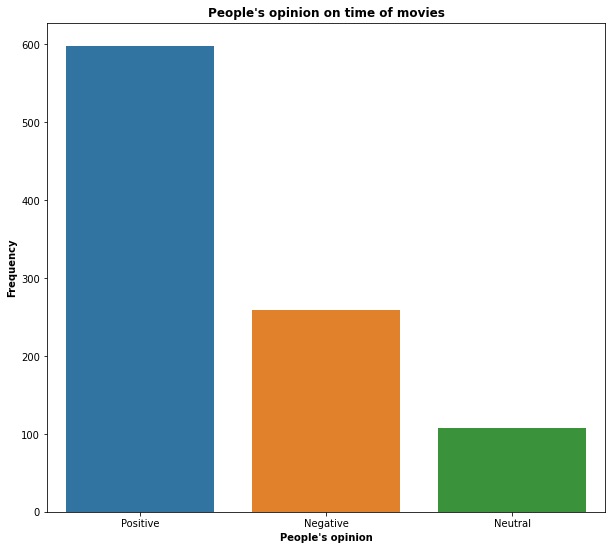

In [49]:
#bar chart
plt.figure(figsize=[10,9]);
orderbycount = df_time.classification.value_counts().index
sns.countplot(data = df_time, x='classification', order = orderbycount);
plt.title('People\'s opinion on time of movies', fontsize=12, weight='bold');
plt.xlabel('People\'s opinion',fontsize=10, weight='bold');
plt.ylabel('Frequency',fontsize=10, weight='bold');

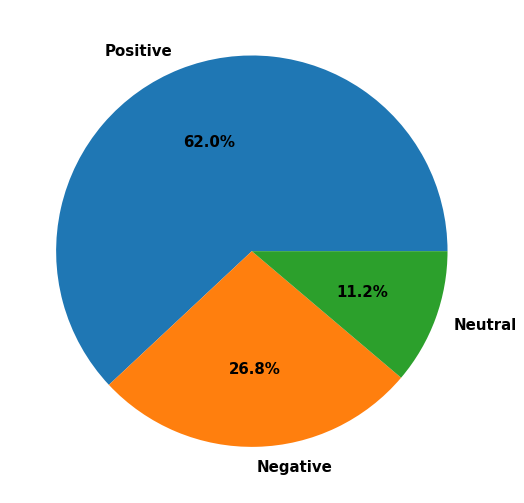

In [50]:
#pie chart
plt.figure(figsize=[10,9]);
y = df_time.classification.value_counts()
myLabels = ["Positive","Negative","Neutral"]
plt.pie(y, labels= myLabels , autopct= '%1.1f%%', textprops={'fontsize':15, 'weight':'bold'})
plt.show()